In [2]:
import sys
sys.path.insert(1, '/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools')
import getters
import matplotlib.pyplot as plt

In [5]:
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/20230220/"
specs = getters.get_raw_data(path, filetype="spectrums", pol="P")

Keys to read: ['P1']


Reading spectrums key: P: 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]


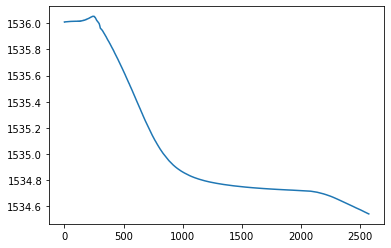

In [12]:
specs = specs.loc[(specs["Wav1-1"]>1530)]
plt.plot(specs["Wav1-1"])